In [25]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import InstrumentalBroadening, RotationalBroadening
from broadpy.utils import load_example_data

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
wave, flux = load_example_data()
RB = RotationalBroadening(wave, flux)

### Limb Darkening

Linear limb darkening is a simple model that describes how the intensity of a star's light varies with the angle between the observer's line of sight and the normal (perpendicular) to the star's surface. This variation is described by the limb darkening parameter, $\epsilon$, where $\epsilon = 0$ corresponds to no limb darkening (uniform brightness across the stellar disk), and $\epsilon = 1$ corresponds to maximum limb darkening (where the center of the disk is much brighter than the edges, or "limb," of the star).

The intensity of the star as a function of the angle $\mu$, which is the cosine of the angle between the line of sight and the normal to the stellar surface, is given by:

$$
I(\mu) = I_0(1 - \epsilon(1 - \mu))
$$

Here, $I_0$ is the intensity at the center of the star's disk (where $\mu = 1$), and $\mu = \cos \theta$, with $\theta$ being the angle between the line of sight and the normal to the surface of the star.

### Influence on Rotational Broadening

Rotational broadening occurs because different parts of a rotating star have different radial velocities relative to the observer, leading to a Doppler shift in the observed spectral lines. This effect broadens the spectral lines, and the degree of broadening is influenced by limb darkening.

When limb darkening is present, the intensity distribution across the star’s disk is non-uniform. The center of the disk, which has a higher intensity, contributes more to the observed spectrum than the edges. Since the edges (limbs) of the star rotate at different velocities (due to rotation), their contribution to the broadening is weighted by their lower intensity due to limb darkening. This results in a more complex and less pronounced broadening profile compared to a uniformly bright star. As a result, the rotational broadening effect can be less sharp, and the wings of the spectral lines can appear less extended, depending on the value of $\epsilon$.


In [27]:
vsini = 5.

epsilon_range = np.linspace(0.12, 0.96, 4)
flux_vsini = RB(vsini, 0.0) # no limb darkening

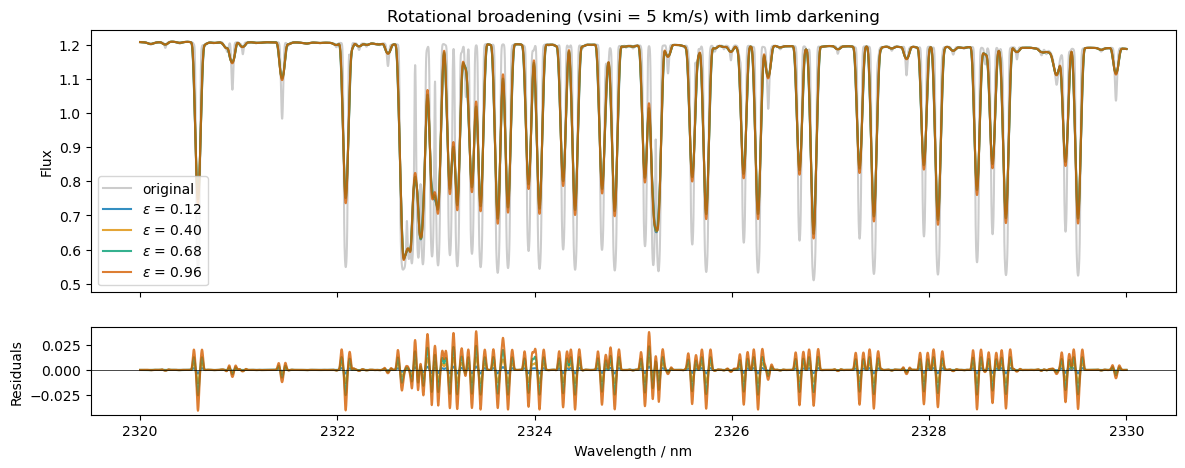

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(wave, flux, label='original', color='black', alpha=0.2)

for eps in epsilon_range:
    flux_vsini_eps = RB(vsini, eps)
    ax[0].plot(wave, flux_vsini_eps, label=f'$\epsilon$ = {eps:.2f}', alpha=0.8)
    res = flux_vsini_eps - flux_vsini # residuals with respect to the no limb darkening case
    ax[1].plot(wave, res, alpha=0.8)

ax[1].axhline(0, color='black', linestyle='-', lw=0.5)
ax[0].legend()
ax[0].set(ylabel='Flux', title=f'Rotational broadening (vsini = {vsini:.0f} km/s) with limb darkening')
ax[1].set(xlabel='Wavelength / nm', ylabel='Residuals')
plt.show()
    

